In [5]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import game
import model

In [8]:
board_size = 8
output_size = 4
hidden_nodes = 16
learning_rate = 1e-3
maximum_discount = .99
random_action_threshold = 0.1
game_max_length = 1024
num_episodes = 100000
save_interval = 100

In [9]:
env = game.Game(board_size)
rlModel = model.RLModel(nodes=[board_size ** 2 * 3, hidden_nodes, output_size], learning_rate=learning_rate)

saved_R_per_step = -10
jList = []
rList = []
for i in range(num_episodes):
    s = env.clear_board()
    rAll = 0
    d = False
    j = 0
    while j < game_max_length:
        j += 1
        s = env.get_board()
        a = np.argmax(rlModel.predict(s)[0])
        if np.random.rand(1) < random_action_threshold:
            a = env.random_action()
        s1, reward, done = env.step(a)
        rlModel.train_single_step(s, s1, a, reward, maximum_discount)
        rAll += reward
        if done:
            break
        random_action_threshold = 1./((i/50) + 10)
    if i % save_interval == 0 and i > 0:
        R_per_step = sum(rList[-save_interval:]) / sum(jList[-save_interval:])
        print('Done {}/{} {:.2f}% Last game length: {}, Average game length: {}, Average length for last {}: {}, average R/step in last {}: {}'.format(i, num_episodes, i/num_episodes*100,j, sum(jList)/i, save_interval, sum(jList[-save_interval:])/save_interval, save_interval, R_per_step))
        if saved_R_per_step < R_per_step:
            print('Saved with R/step: {}'.format(R_per_step))
            saved_R_per_step = R_per_step
            rlModel.saveVariables()
    jList.append(j)
    rList.append(rAll)
print("Average R: " + str(sum(rList)/num_episodes))
print("Average lenght: " + str(sum(jList)/num_episodes))

Done 100/100000 0.10% Last game length: 14, Average game length: 19.96, Average length for last 100: 19.96, average R/step in last 100: -2.937875751503006
Saved with R/step: -2.937875751503006
Done 200/100000 0.20% Last game length: 28, Average game length: 22.425, Average length for last 100: 24.89, average R/step in last 100: -2.413419043792688
Saved with R/step: -2.413419043792688
Done 300/100000 0.30% Last game length: 32, Average game length: 32.58, Average length for last 100: 52.89, average R/step in last 100: -1.3321989033843826
Saved with R/step: -1.3321989033843826
Done 400/100000 0.40% Last game length: 131, Average game length: 38.7625, Average length for last 100: 57.31, average R/step in last 100: -1.2735997208166114
Saved with R/step: -1.2735997208166114
Done 500/100000 0.50% Last game length: 29, Average game length: 43.902, Average length for last 100: 64.46, average R/step in last 100: -1.1585479367049334
Saved with R/step: -1.1585479367049334
Done 600/100000 0.60% La

KeyboardInterrupt: 

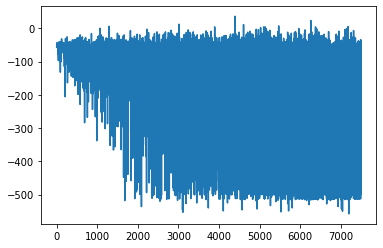

In [10]:
plt.plot(rList)

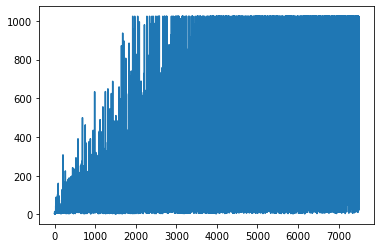

In [11]:
plt.plot(jList)

In [12]:
rlModel.saveVariables()